Para facilitar a visualização, vamos simplificar um pouco e usar uma função hipótese com 2 parâmetros, $𝑎_1$ e $𝑎_2$, com $𝑎_0 = 0$

$\hat{𝑦}(𝑖) = ℎ(𝒙_𝑖) = 𝑎_1𝑥_1(𝑖) + 𝑎_2𝑥_2(𝑖)$.

In [37]:
# Import all the necessary libraries.
import random
import matplotlib.pyplot as plt
import math
import numpy as np
import functools
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from IPython.core.display import display, HTML

"""
Generate data points for plotting the error surface.
"""
def calculateErrorSurface(y, x1, x2):
    # Generate values for parameter space.
    N = 200
    a1 = np.linspace(-30.0, 34.0, N)
    a2 = np.linspace(-30.0, 34.0, N)

    A1, A2 = np.meshgrid(a1, a2)

    # Generate points for plotting the cost-function surface.
    J = np.zeros((N,N))
    for iter1 in range(0, N):
        for iter2 in range(0, N):
            yhat = A1[iter1][iter2]*x1 + A2[iter1][iter2]*x2
            J[iter1][iter2] = (1/M)*np.sum( np.square(y - yhat)  )
            
    return J, A1, A2
            
"""
Calculate closed-form solution using the normal equation.
"""
def calculateClosedFormSolution(X):
    # Closed-form solution.
    a_opt = np.linalg.pinv(np.transpose(X).dot(X)).dot(np.transpose(X).dot(y))
    yhat = a_opt[0, 0]*x1 + a_opt[1, 0]*x2
    Joptimum = (1/M)*np.sum(np.power((y - yhat), 2) )
    
    return Joptimum, a_opt

"""
Batch gradient descent solution.
"""
def batchGradientDescent(alpha, n_iterations, X_b, y):


    a = np.zeros((2,n_iterations))
    Jgd = np.zeros(n_iterations)

    a[0,0] = -30
    a[1,0] = -30

    yhat = a[0,0]*x1 + a[1,0]*x2

    Jgd[0] =    (1/M)*np.sum(np.power((y-yhat),2))

    error = 1
    iter = 0

    while(error>0.001 and iter<n_iterations):
        yhat = a[0, iter]*x1 + a[1, iter]*x2
        update =    -(2/M)*np.transpose((y-yhat)).dot(X)
        a_aux = a[:,iter] - alpha*np.transpose(update)
        a[0,iter+1] = a_aux[0,0]
        a[1,iter+1] = a_aux[1,0]
        yhat = a[0,iter+1]*x1 + a[1,iter+1]*x2
        Jgd[iter+1] = (1/M)*sum(np.power(y-yhat,2))
        error = np.abs(Jgd[iter]-Jgd[iter+1])
        iter =iter+1
    return a_aux, a, Jgd, iter

"""
Hypothesis Function
"""
def h(X_b, a):
    return a.T.dot(X_b.T)
    
## --------------------------------------------------------   

In [38]:
M = 10000 


np.random.seed(1234)
x1 = 10.0*np.random.randn(M,1)

x2 = 10.0*np.random.randn(M,1)

# Valores de saída labels
y = 2.0*x1 + 2.0*x2 + 10.0*np.random.randn(M,1)

# add x0 = 1 to each instance.
X_b = np.block([x1,x2])
X = X_b    

# Batch gradient descent solution.
alpha = 0.001  # learning rate
n_iterations = 1000

# Calculate data point for plotting error surface.
J, A1, A2 = calculateErrorSurface(y, x1, x2)

# Calculate closed-form solution.
Joptimum, a_opt = calculateClosedFormSolution(X_b)

# Run batch gradient-descent algorithm.
a_aux, a, Jgd, iter = batchGradientDescent(alpha, n_iterations, X_b, y)

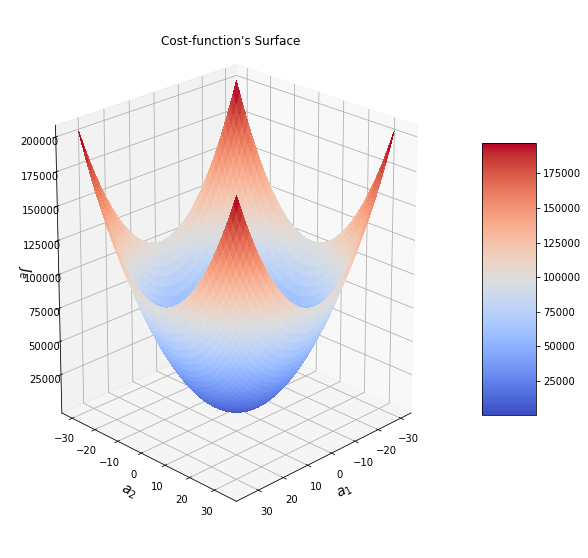

<Figure size 432x288 with 0 Axes>

In [39]:
# Plot cost-function surface.
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(A1, A2, J, cmap=cm.coolwarm, linewidth=0, antialiased=False)
# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_xlabel('$a_1$', fontsize=14)
ax.set_ylabel('$a_2$', fontsize=14)
ax.set_zlabel('$J_e$', fontsize=14)
plt.title('Cost-function\'s Surface')
ax.view_init(20, 45)
#Show the plot.
plt.show()
# Save figure into file.
plt.savefig("error_surface_bgd.png", dpi=600)

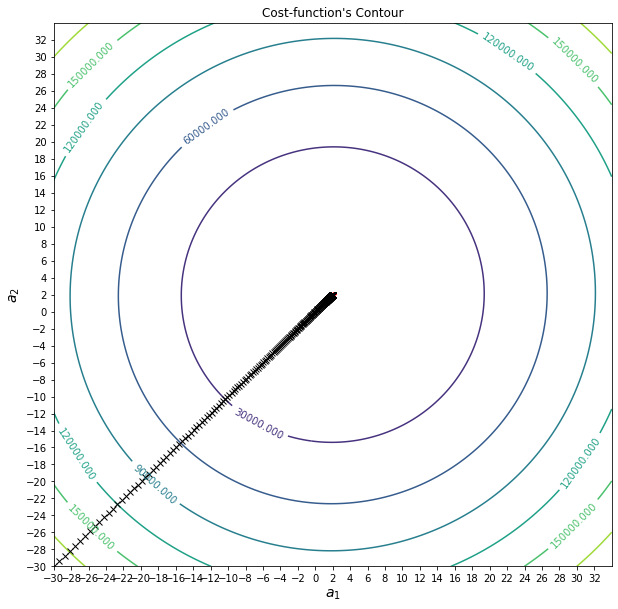

<Figure size 432x288 with 0 Axes>

In [40]:
# Plot figure.        
fig = plt.figure(figsize=(10,10))
cp = plt.contour(A1, A2, J)
plt.clabel(cp, inline=1, fontsize=10)
plt.xlabel('$a_1$', fontsize=14)
plt.ylabel('$a_2$', fontsize=14)
plt.title('Cost-function\'s Contour')
plt.plot(a_opt[0], a_opt[1], c='r', marker='*')
plt.plot(a[0, 0:iter], a[1, 0:iter], 'kx')
plt.xticks(np.arange(-30, 34, step=2.0))
plt.yticks(np.arange(-30, 34, step=2.0))
plt.show()
# save figure into file.
plt.savefig("error_contour_bgd.png", dpi=600)

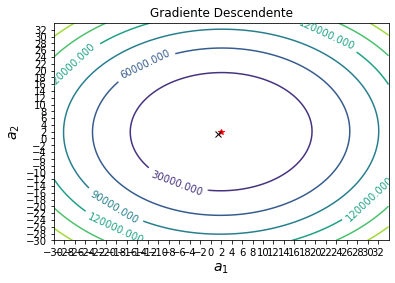

In [41]:
fig, ax = plt.subplots()
cp = plt.contour(A1, A2, J)
plt.clabel(cp, inline=1, fontsize=10)
plt.plot(a_opt[0], a_opt[1], c='r', marker='*')
xl = []
yl = []
ln, = plt.plot(xl, yl, 'kx', animated=True)
plt.title('Gradiente Descendente')
plt.xticks(np.arange(-30, 34, step=2.0))
plt.yticks(np.arange(-30, 34, step=2.0))

def init():
    ax.set_xlabel('$a_1$', fontsize=14)
    ax.set_ylabel('$a_2$', fontsize=14)
    return ln,

def update(frame):
    ln.set_data(a[0, frame], a[1, frame])
    return ln,

ani2 = FuncAnimation(fig, update, frames=200, init_func=init, blit=False, interval=1000)
display(HTML(ani2.to_html5_video()))

ani2.save('animated_linear_regression_contour_example2.mp4', fps=30, extra_args=['-vcodec', 'libx264'])

Text(0.5, 1.0, 'Error vs. Iteration number')

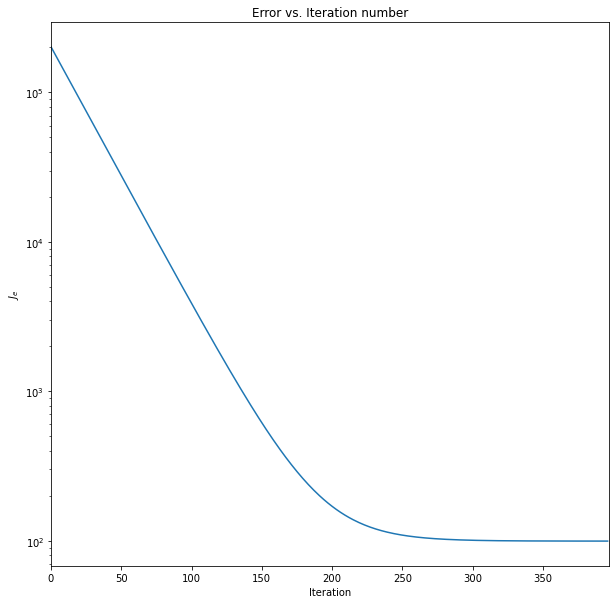

In [42]:
fig = plt.figure(figsize=(10,10))

plt.plot(np.arange(0, iter), Jgd[0:iter])
plt.xlim((0, iter))
plt.yscale('log')
plt.xlabel('Iteration')
plt.ylabel('$J_e$')
plt.title('Error vs. Iteration number')
